# NAME:- Adarsh Kumar Gupta


# GRIP JULY 21

# Data Science and Business Analytics


# Prediction using Supervised ML

# Objective:- Predict the percentage of a student based on the no. of study hours. 


## Importing libraries required 

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

## Reading the data from the URL 

In [2]:
url = "http://bit.ly/w-data"
student_data=pd.read_csv(url)
student_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Plotting distribution graph 

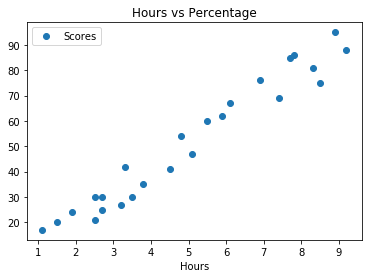

In [3]:
student_data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.show()

plt.scatter(student_data['Hours'],student_data['Scores'])

## Dividing the data into input(attributes) 2-D array and output(labels) 1-D array

In [4]:
X = student_data.iloc[:, :-1].values  
y = student_data.iloc[:, 1].values  

In [5]:
print(X)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


## Splitting data into training data and test data

In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=42) 

In [7]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[2.7]
 [3.3]
 [5.1]
 [3.8]
 [1.5]
 [3.2]
 [4.5]
 [8.9]
 [8.5]
 [3.5]
 [2.7]
 [1.9]
 [4.8]
 [6.1]
 [7.8]
 [5.5]
 [7.7]
 [1.1]
 [7.4]
 [9.2]]
[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]
[25 42 47 35 20 27 41 95 75 30 30 24 54 67 86 60 85 17 69 88]
[81 30 21 76 62]


## Training the model with train data

In [8]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Plotting distribution of test data

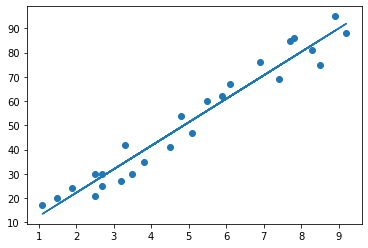

In [9]:
Y = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, Y);
plt.show()

## Predicting labels on on test data

In [10]:
y_pred = regressor.predict(X_test) # Predicting the scores

## Actual vs Predicted

In [11]:
comparison=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print(comparison)

   Actual  Predicted
0      81  83.188141
1      30  27.032088
2      21  27.032088
3      76  69.633232
4      62  59.951153


## Actual vs Predicted Visualisation

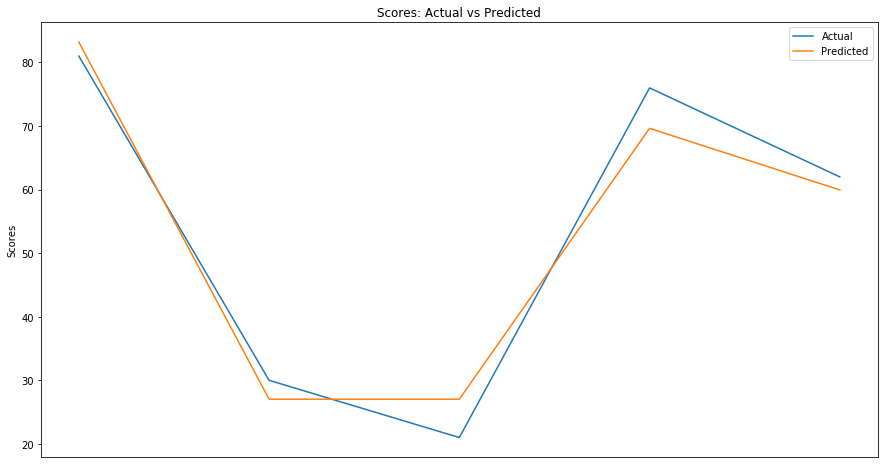

In [12]:
A = y_test.reshape(-1, 1)
B = y_pred.reshape(-1, 1)
plt.rcParams['figure.figsize'] = 15,8
plt.figure()
plt.plot(A[-100:], label="Actual")
plt.plot(B[-100:], label="Predicted")
plt.legend()
plt.title("Scores: Actual vs Predicted")
plt.ylabel("Scores")
plt.xticks(())
plt.show()

# Predicting on our own value of attributes

In [13]:
hours = [[8]]
pred = regressor.predict(hours)
print("No of Hours = {}".format(*hours[0]))
print(*hours)
print("Predicted Score = {}".format(pred[0]))
print(pred)

No of Hours = 8
[8]
Predicted Score = 80.28351758954531
[80.28351759]


## Evaluation of the model

In [14]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(mean_absolute_error(y_test, y_pred))

print(mean_squared_error(y_test, y_pred))

print(r2_score(y_test, y_pred)*100)

3.9207511902099244
18.943211722315272
96.78055545167994
